In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.platform import gfile
import IPython.display as ipyd
import os
from libs import gif, nb_utils

In [2]:
%matplotlib inline

In [3]:
sess = tf.InteractiveSession()

In [4]:
from libs import inception
net = inception.get_inception_model() #downloads inception model, returns graph and labels

In [5]:
tf.import_graph_def(net['graph_def'], name='inception')  #load graph into tf graph

In [6]:
nb_utils.show_graph(net['graph_def'])

In [7]:
net['labels']  # class labels from the network

[(0, 'dummy'),
 (1, 'kit fox'),
 (2, 'English setter'),
 (3, 'Siberian husky'),
 (4, 'Australian terrier'),
 (5, 'English springer'),
 (6, 'grey whale'),
 (7, 'lesser panda'),
 (8, 'Egyptian cat'),
 (9, 'ibex'),
 (10, 'Persian cat'),
 (11, 'cougar'),
 (12, 'gazelle'),
 (13, 'porcupine'),
 (14, 'sea lion'),
 (15, 'malamute'),
 (16, 'badger'),
 (17, 'Great Dane'),
 (18, 'Walker hound'),
 (19, 'Welsh springer spaniel'),
 (20, 'whippet'),
 (21, 'Scottish deerhound'),
 (22, 'killer whale'),
 (23, 'mink'),
 (24, 'African elephant'),
 (25, 'Weimaraner'),
 (26, 'soft-coated wheaten terrier'),
 (27, 'Dandie Dinmont'),
 (28, 'red wolf'),
 (29, 'Old English sheepdog'),
 (30, 'jaguar'),
 (31, 'otterhound'),
 (32, 'bloodhound'),
 (33, 'Airedale'),
 (34, 'hyena'),
 (35, 'meerkat'),
 (36, 'giant schnauzer'),
 (37, 'titi'),
 (38, 'three-toed sloth'),
 (39, 'sorrel'),
 (40, 'black-footed ferret'),
 (41, 'dalmatian'),
 (42, 'black-and-tan coonhound'),
 (43, 'papillon'),
 (44, 'skunk'),
 (45, 'Staffordsh

In [8]:
g = tf.get_default_graph() #this loads the prev loaded inception net
names =[op.name for op in g.get_operations()] #input in first layer, output in last
print(names)

['inception/input', 'inception/conv2d0_w', 'inception/conv2d0_b', 'inception/conv2d1_w', 'inception/conv2d1_b', 'inception/conv2d2_w', 'inception/conv2d2_b', 'inception/mixed3a_1x1_w', 'inception/mixed3a_1x1_b', 'inception/mixed3a_3x3_bottleneck_w', 'inception/mixed3a_3x3_bottleneck_b', 'inception/mixed3a_3x3_w', 'inception/mixed3a_3x3_b', 'inception/mixed3a_5x5_bottleneck_w', 'inception/mixed3a_5x5_bottleneck_b', 'inception/mixed3a_5x5_w', 'inception/mixed3a_5x5_b', 'inception/mixed3a_pool_reduce_w', 'inception/mixed3a_pool_reduce_b', 'inception/mixed3b_1x1_w', 'inception/mixed3b_1x1_b', 'inception/mixed3b_3x3_bottleneck_w', 'inception/mixed3b_3x3_bottleneck_b', 'inception/mixed3b_3x3_w', 'inception/mixed3b_3x3_b', 'inception/mixed3b_5x5_bottleneck_w', 'inception/mixed3b_5x5_bottleneck_b', 'inception/mixed3b_5x5_w', 'inception/mixed3b_5x5_b', 'inception/mixed3b_pool_reduce_w', 'inception/mixed3b_pool_reduce_b', 'inception/mixed4a_1x1_w', 'inception/mixed4a_1x1_b', 'inception/mixed4a_3

In [9]:
input_name = names[0] + ':0' #get the output of input layer which is the first operation
x = g.get_tensor_by_name(input_name)

In [10]:
output_name = names[-1] + ':0' #get output of last layer, which is the probability of 1000 classes
softmax = g.get_tensor_by_name(name=output_name)

In [11]:
x.get_shape()

TensorShape(None)

In [12]:
softmax.get_shape()

TensorShape([Dimension(None), Dimension(1008)])

In [13]:
#make a prediction using this network

from skimage.data import coffee

og=coffee()

print(og.min(), og.max())

0 255


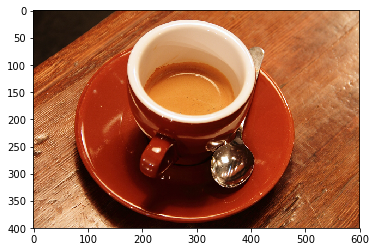

In [14]:
plt.imshow(og)

In [15]:
# crop image to 299

img = inception.preprocess(og)
print(og.shape, img.shape)

(400, 600, 3) (299, 299, 3)


C:\Users\itpstudent\Miniconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [16]:
print(img.min(), img.max()) #different since mean of imagenet 117 has been subtracted during preprocessing

-117.0 138.0


In [17]:
img_4d = np.expand_dims(img, axis=0)
print(img_4d.shape)

(1, 299, 299, 3)


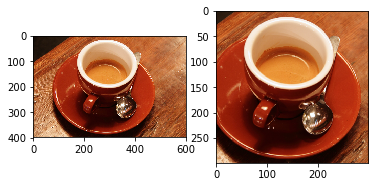

In [18]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(og)
ax[1].imshow(inception.deprocess(img))  # add back mean just to display image

In [19]:
res = np.squeeze(softmax.eval(feed_dict={x:img_4d}))

In [20]:
res.shape

(16, 1008)

In [21]:
res = np.mean(res, 0)

In [22]:
res.shape

(1008,)

In [23]:
large = np.argmax(res, axis=0)

In [24]:
large

947

In [25]:
net['labels'][947]  #top prediction

(947, 'espresso')

In [26]:
#top 5 predictions

print([(res[idx], net['labels'][idx]) for idx in res.argsort()[-5:][::-1]])

[(0.99849206, (947, 'espresso')), (0.000631253, (859, 'cup')), (0.00050241494, (953, 'chocolate sauce')), (0.00019483207, (844, 'consomme')), (0.00013370356, (822, 'soup bowl'))]


In [27]:
W_1 = g.get_tensor_by_name('inception/conv2d0_w:0')

In [30]:
W_1.get_shape().as_list()

[7, 7, 3, 64]

In [31]:
#output of first conv layer before relu

feature = g.get_tensor_by_name('inception/conv2d0_pre_relu:0')

In [32]:
feature.get_shape()

TensorShape([Dimension(None), Dimension(None), Dimension(None), Dimension(64)])

In [33]:
feature = feature.eval(feed_dict={x:img_4d})

In [34]:
feature.shape #shape of input image after one layer of convolution

(1, 150, 150, 64)

In [35]:
pre_relu = g.get_tensor_by_name('inception/conv2d0_pre_relu:0')
gradient = tf.gradients(tf.reduce_max(pre_relu, 3), x) # find gradient of max neuron of layer 1 conv wrt input image

In [41]:
resu = sess.run(gradient, feed_dict={x:img_4d})[0]

In [45]:
resu.shape

(1, 299, 299, 3)

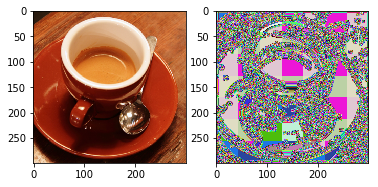

In [46]:
fig, ax =plt.subplots(1,2)
ax[0].imshow(inception.deprocess(img))
ax[1].imshow(resu[0])

In [47]:
def normalize(img, s=0.1):
    z = img / np.std(img)
    return np.uint8(np.clip((z-z.mean())/max(z.std(),1e-4)*s + 0.5,0,1)*255)

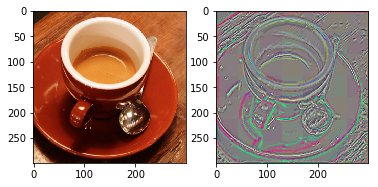

In [48]:
r = normalize(resu)
fig, ax = plt.subplots(1,2)
ax[0].imshow(inception.deprocess(img))
ax[1].imshow(r[0])

In [50]:
def compute_single_neuron_gradient(input_placeholder, img, layer_name, neuron_i):
    feature = g.get_tensor_by_name(layer_name)
    gradient = tf.gradients(tf.reduce_mean(feature[:,:,:,neuron_i]), input_placeholder)
    res = sess.run(gradient, feed_dict={input_placeholder:img})[0]
    return res
    
def compute_all_neuron_gradients(input_placeholder, img, layer_name):
    feature = g.get_tensor_by_name(layer_name)
    layer_shape = tf.shape(feature).eval(feed_dict={input_placeholder:img})
    gradients = []
    for neuron_i in range(layer_shape[-1]):
        gradients.append(compute_single_neuron_gradient(input_placeholder, img, layer_name, neuron_i))
    return gradients

In [51]:
gradients = compute_all_neuron_gradients(x, img_4d, 'inception/conv2d1_pre_relu:0')

In [55]:
gradients[0].shape

(1, 299, 299, 3)

In [52]:
gradients_norm = [normalize(gradient_i[0]) for gradient_i in gradients]

In [58]:
from libs import utils
montage = utils.montage(np.array(gradients_norm))

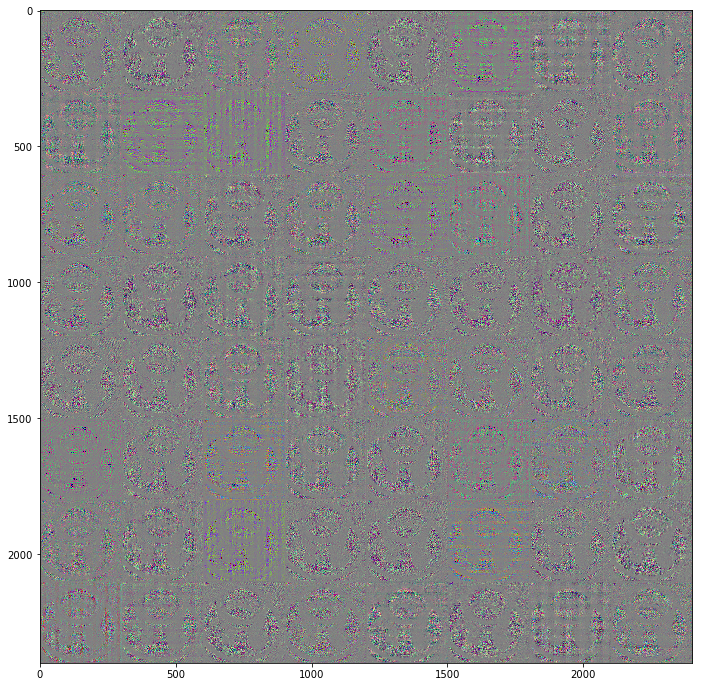

In [59]:
plt.figure(figsize=(12,12))
plt.imshow(montage)

In [60]:
maxpools = [name for name in names if 'maxpool' in name.split('/')[-1]]
print(maxpools)

['inception/maxpool0', 'inception/maxpool1', 'inception/maxpool4', 'inception/maxpool10']


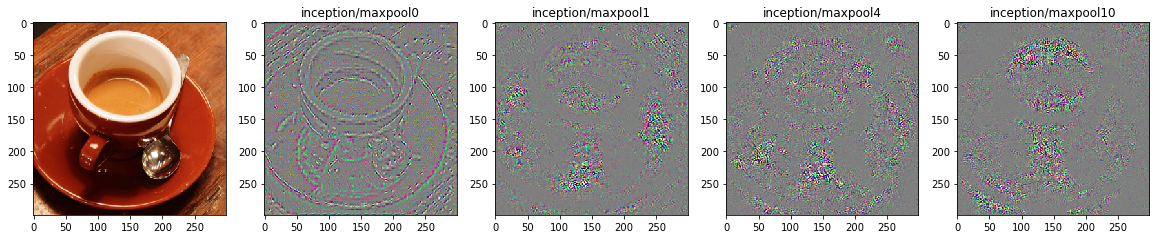

In [62]:
fig,ax = plt.subplots(1,5,figsize=(20,5))
base = img_4d
ax[0].imshow(inception.deprocess(img))

for feature_i, featurename in enumerate(maxpools):
    feature = g.get_tensor_by_name(featurename+":0") #find the layer
    neuron = tf.reduce_max(feature, len(feature.get_shape())-1) #pick the max activated neuron in that layer
    gradient = tf.gradients(tf.reduce_sum(neuron), x)
    this_res = sess.run(gradient[0], feed_dict={x: base})[0]
    ax[feature_i+1].imshow(normalize(this_res))
    ax[feature_i+1].set_title(featurename)